In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

from scipy.ndimage.morphology import binary_erosion

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


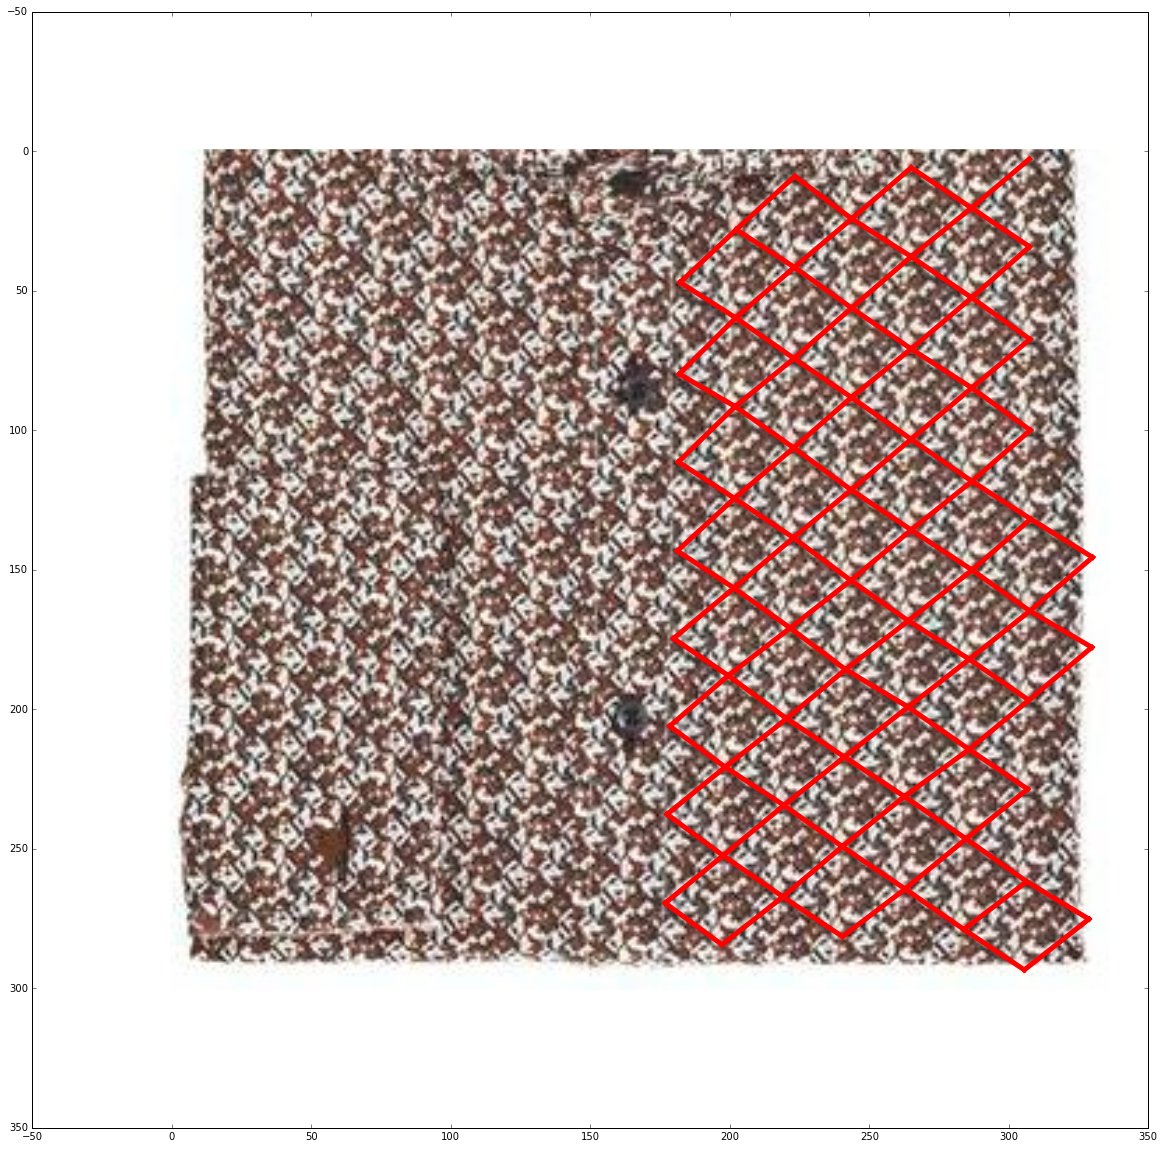

In [4]:
wdir = '/home/pisarik/datasets/shirts/data_for_test1/txt02_pxy_M/cropped/'
shirt_num = '14'
shirt_path = wdir + str(shirt_num) + '.jpg'
shirt = cv2.imread(shirt_path)
plt.figure(figsize=(20, 20))
plt.imshow(shirt)

[v_x, v_y, is_good] = ReadGraph(wdir, shirt_num, shirt.shape)
for i, row in enumerate(v_x):
    for j, elem in enumerate(v_x[i]):
        if (i != v_x.shape[0] - 1):
            if (is_good[i, j] and is_good[i+1, j]):
                plt.plot([v_x[i, j], v_x[i+1, j]],
                         [v_y[i, j], v_y[i+1, j]],
                         'r', linewidth=5)
        
        if (j != v_x.shape[1] - 1):
            if (is_good[i, j] and is_good[i, j+1]):
                plt.plot([v_x[i, j], v_x[i, j+1]],
                         [v_y[i, j], v_y[i, j+1]],
                         'r', linewidth=5)
                
        

(14, 7)
[241.06999999999999, 219.39999999999998, 220.37, 198.32999999999998]
[217.06999999999999, 234.42000000000002, 203.36000000000001]
[[ 203.  198.]
 [ 234.  241.]]


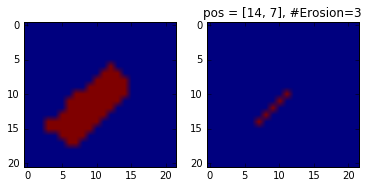

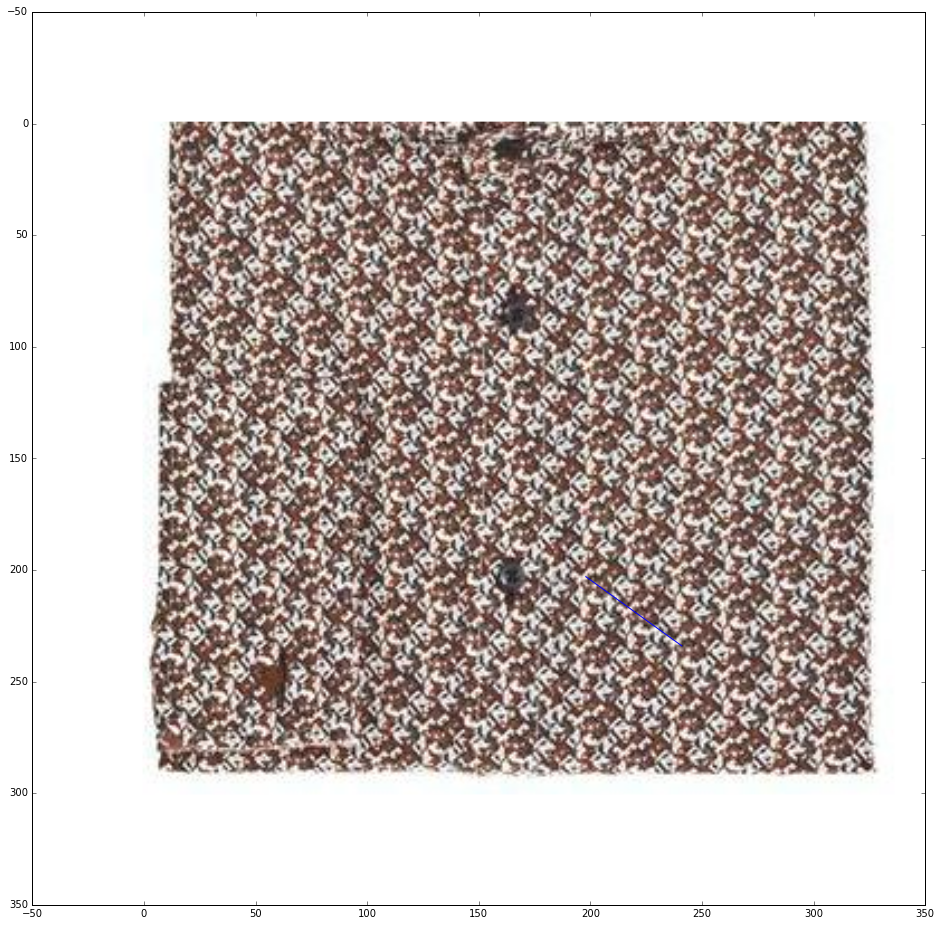

In [5]:
tmpIsGood = is_good.copy()
cntErosion=0
for ii in range(3):
    tmp = binary_erosion(tmpIsGood)
    if np.sum(tmp)>0:
        tmpIsGood = tmp
        cntErosion += 1
    else:
        break
rndR,rndC = np.where(tmpIsGood)
idxRnd = np.random.randint(len(rndR))
rndRC = (rndR[idxRnd], rndC[idxRnd])
print(rndRC)
plt.subplot(1,2,1), plt.imshow(is_good)
plt.subplot(1,2,2), plt.imshow(tmpIsGood)
plt.title('pos = %s, #Erosion=%d' % (list(rndRC), cntErosion) )

X = []
Y = []
X += [v_x[(rndRC[0] + 0, rndRC[1] + 0)]]
X += [v_x[(rndRC[0] + 1, rndRC[1] + 0)]]
X += [v_x[(rndRC[0] + 0, rndRC[1] + 1)]]
X += [v_x[(rndRC[0] + 1, rndRC[1] + 1)]]
print(X)

Y += [v_y[(rndRC[0] + 0, rndRC[1] + 0)]]
Y += [v_y[(rndRC[0] + 1, rndRC[1] + 0)]]
Y += [v_y[(rndRC[0] + 0, rndRC[1] + 1)]]
print(Y)
Y += [v_y[(rndRC[0] + 1, rndRC[1] + 1)]]
min_x = min(X)
max_x = max(X)
min_y = min(Y)
max_y = max(Y)
bbox = np.array([[min_y, min_x], [max_y, max_x]])
bbox = np.round(bbox)
print(bbox)
plt.figure(figsize=(16, 16))
plt.hold(True)
plt.imshow(shirt)
plt.plot(bbox[:,1], bbox[:,0])
plt.hold(False)

(31, 43, 3)


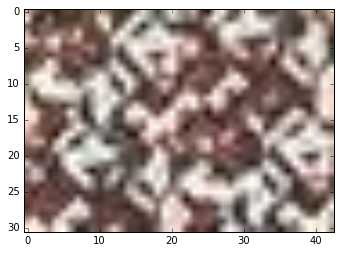

In [6]:
bbox = bbox.astype(np.int)
pattern = shirt[bbox[0,0]:bbox[1,0], bbox[0,1]:bbox[1,1]]
print(pattern.shape)
plt.imshow(pattern)

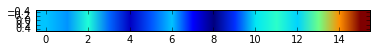

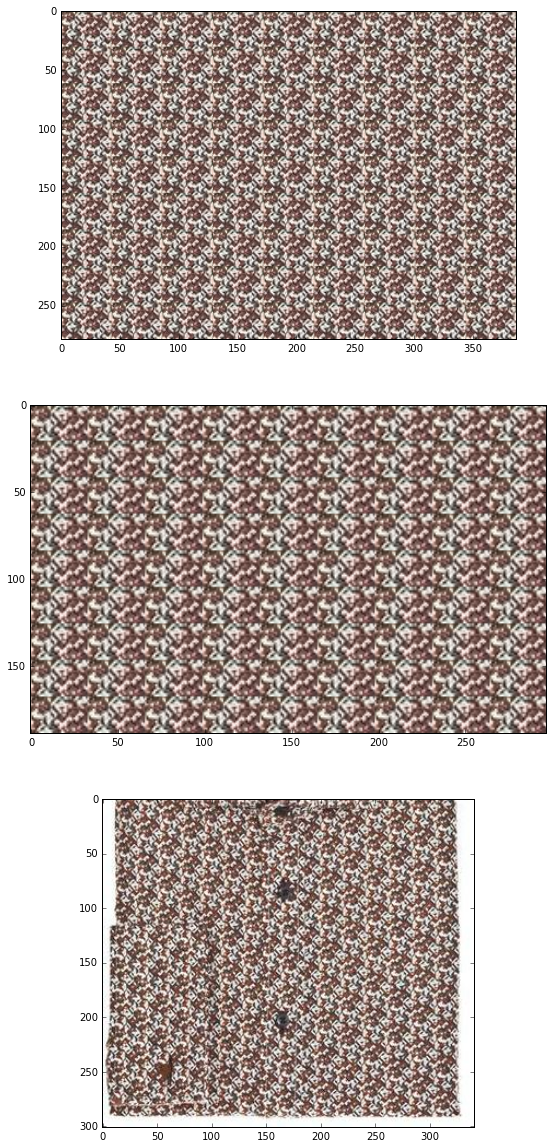

In [11]:
min_pattern = MinimizePatternByTemplMatch(pattern)
tiled = np.tile(min_pattern, (9, 9, 1))
stupid = np.tile(pattern, (9, 9, 1))

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1)
plt.imshow(stupid)
plt.subplot(3, 1, 2)
plt.imshow(tiled)
plt.subplot(3, 1, 3)
plt.imshow(shirt)

In [3]:
def MinimizePatternByTemplMatch(pattern):
    height = pattern.shape[0]
    width = pattern.shape[1]
    
    left   = pattern[:, :width/2]
    right  = pattern[:, width/2:]
    top    = pattern[:height/2]
    bottom = pattern[height/2:]
    
    #search left on right
    result = cv2.matchTemplate(right, left[:, :left.shape[1]/3], cv2.TM_CCORR_NORMED)
    maxLoc = cv2.minMaxLoc(result)[3]
    max_x = maxLoc[0] + width/2 - left.shape[1]/3/2
    plt.imshow(result)
    
    #search top on bottom
    result = cv2.matchTemplate(bottom, top[:top.shape[0]/3, :], cv2.TM_CCORR_NORMED)
    maxLoc = cv2.minMaxLoc(result)[3]
    max_y = maxLoc[1] + height/2 - top.shape[0]/3/2
    
    return pattern[:max_y, :max_x]

def ReadGraph(wdir, shirt_num, img_shape):
    wdir = wdir + str(shirt_num) + '_result/'
    v_x = np.loadtxt(wdir+'pts_x.csv', delimiter=',') - 100 - 1
    v_y = np.loadtxt(wdir+'pts_y.csv', delimiter=',') - 100 - 1
    is_good = np.loadtxt(wdir+'is_good.csv', dtype='bool', delimiter=',')
    return [v_x, v_y, is_good]

In [25]:
sorted(v_x[is_good])

[114.72,
 115.95999999999999,
 116.27,
 116.88,
 117.27,
 151.75,
 151.91,
 152.56999999999999,
 152.78,
 153.0,
 153.06,
 153.49000000000001,
 187.93000000000001,
 189.21000000000001,
 189.31,
 189.38999999999999,
 189.91999999999999,
 190.16,
 225.84,
 226.31999999999999,
 226.38999999999999,
 226.80000000000001,
 227.19,
 227.84999999999999,
 228.00999999999999,
 229.09,
 264.33999999999997,
 264.54000000000002,
 265.42000000000002,
 265.66000000000003,
 266.0,
 266.30000000000001,
 266.66000000000003,
 267.0,
 301.29000000000002,
 301.5,
 301.73000000000002,
 302.41000000000003,
 302.41000000000003,
 302.42000000000002,
 302.69999999999999,
 303.04000000000002,
 338.0,
 338.25999999999999,
 339.17000000000002,
 339.50999999999999,
 339.66000000000003,
 339.93000000000001,
 340.16000000000003,
 340.56,
 373.45999999999998,
 373.64999999999998,
 374.02999999999997,
 374.69999999999999,
 375.17000000000002,
 375.41000000000003,
 375.81,
 375.95999999999998,
 376.26999999999998,
 408.2

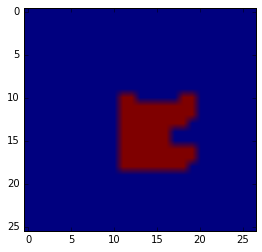

In [23]:
plt.imshow(is_good)

TypeError: Invalid dimensions for image data

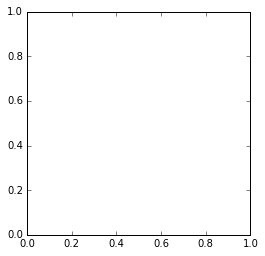

In [135]:
plt.imshow(shirt[bbox.astype(np.int)])